In [33]:

import numpy as np 
import matplotlib.pyplot as plt
import random
import math


class PartitionGenerator():
    def __init__(self, minWidth,  maxWidth, maxAspectRatioDeviationPercentage, containerheight=100, containerwidth=100):
        self.minWidth = minWidth
        self.maxWidth = maxWidth
        # If this is 70, than Height will be 30% to 170% of Width
        self.minHeight = math.floor(minWidth * (1-maxAspectRatioDeviationPercentage/100))
        self.maxHeight = math.floor(maxWidth * (1+maxAspectRatioDeviationPercentage/100))
        self.containerwidth = containerwidth
        self.containerheight = containerheight


        self.array2D = np.zeros((containerheight, containerwidth), dtype=bool)

        self.nextEmptySpace = {"x": 0, "y": 0}

    def generate(self, point=5, save=False):

        xlist = []
        ylist = []

        pointlist = []
        regen = True

        for i in range(point):
           
            while regen:
                x = random.randint(self.minWidth, self.containerwidth-self.minWidth)
                y = random.randint(self.minHeight, self.containerheight-self.minHeight)
                
                for xx in xlist:
                    if abs(x-xx) < 5:
                       break

                for yy in xlist:
                    if abs(y-yy) < 5:
                        break
                
                regen = False
                
                        


            xlist.append(x)
            ylist.append(y)

            lowx, lowy = (0,0)
            highx = self.containerwidth
            highy = self.containerheight

            for point in pointlist:



                
                if point[0] > lowx and point[0]< x:
                    if self.array2D[point[0],y]:
                        lowx = point[0] 
                if point[0] < highx and point[0]> x:
                    if self.array2D[point[0],y]:
                        highx = point[0]
                if point[1] > lowy and point[1]< y:
                    if self.array2D[x,point[1]]:
                        lowy = point[1]
                if point[1] < highy and point[1]> y:
                    if self.array2D[x,point[1]]:
                        highy = point[1]

            
            self.array2D[x,lowy:highy] = True
            self.array2D[lowx:highx,y] = True

            print("point:", (x,y))

            pointlist.append((x,y))
            plt.imshow(self.array2D, interpolation='none')
            plt.show()  




       

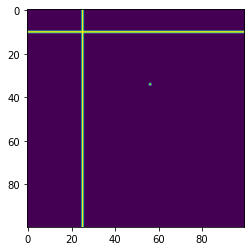

In [22]:
array2D = np.zeros((100, 100), dtype=bool)

array2D[10,:] = True
array2D[:,25] = True


array2D[34,56] = True


plt.imshow(array2D)
plt.show()

point: (45, 50)


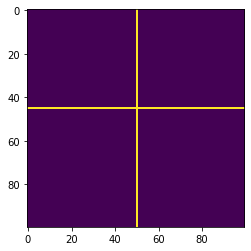

point: (63, 70)


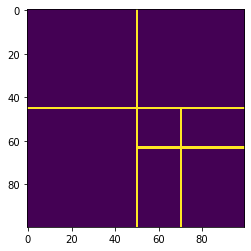

point: (31, 70)


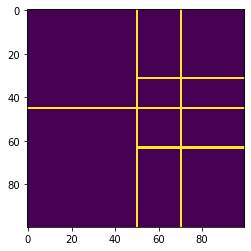

point: (36, 22)


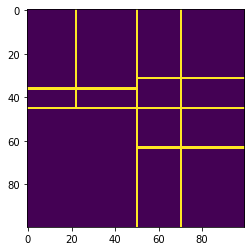

point: (69, 73)


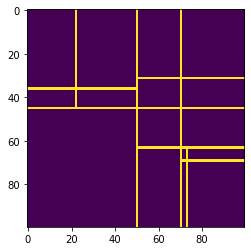

In [35]:
p =PartitionGenerator(20,50,70)
p.generate()